In [ ]:
print("hello world")

: 

In [ ]:
from typing import List


class Solution:
    def binarySearch(self, nums: List[int], target: int) -> int:
        left, right = 0, len(nums) - 1
        while left <= right:
            mid = left + (right - left) // 2
            if nums[mid] == target:
                return mid
            elif nums[mid] < target:
                left = mid + 1
            else:
                right = mid - 1
        return -1

    def maxProfit(self, k: int, prices: List[int]) -> int:
        n = len(prices)
        if n == 0:
            return 0

        # If k is larger than n/2, we can make as many transactions as we want
        if k >= n // 2:
            max_profit = 0
            for i in range(1, n):
                if prices[i] > prices[i - 1]:
                    max_profit += prices[i] - prices[i - 1]
            return max_profit

        # DP table where dp[i][j] represents the max profit using at most i transactions up to day j
        dp = [[0] * n for _ in range(k + 1)]

        for i in range(1, k + 1):
            max_diff = -prices[0]
            for j in range(1, n):
                dp[i][j] = max(dp[i][j - 1], prices[j] + max_diff)
                max_diff = max(max_diff, dp[i - 1][j] - prices[j])

        return dp[k][n - 1]


if __name__ == "__main__":
    s = Solution()
    print(s.maxProfit(2, [3, 2, 6, 5, 0, 3]))  # Expected output: 7

In [ ]:
class Solution:
    def lower_bound(self, nums: List[int], target: int) -> int:
        if not nums:
            return -1
        left, right = 0, len(nums) - 1
        while left <= right:
            mid = left + (right - left) // 2
            if nums[mid] < target:
                left = mid + 1
            else:
                right = mid - 1
        return left
    def upper_bound(self, nums: List[int], target: int) -> int:
        if not nums:
            return -1
        left, right = 0, len(nums) - 1
        while left <= right:
            mid = left + (right - left) // 2
            if nums[mid] <= target:
                left = mid + 1
            else:
                right = mid - 1
        return right
    def countPalindromicSubsequence(self, s: str) -> int:
        map = {}
        n = len(s)
        for i in range(n):
            if s[i] not in map:
                map.update({s[i]: [i]})
            else:
                map[s[i]].append(i)

        visited = set()
        for i in range(1, n - 1):
            for j in range(26):
                ch = chr(ord('a') + j)
                left = self.lower_bound(map.get(ch, []), i)
                right = self.upper_bound(map.get(ch, []), i)
                if 

                


In [ ]:
import asyncio


async def worker(lock, name):
    print(f"Coroutine {name}: Trying to acquire lock...")
    async with lock:
        print(f"Coroutine {name}: Lock acquired. Accessing shared resource...")
        await asyncio.sleep(0.1)  # Simulate work
        print(f"Coroutine {name}: Releasing lock.")


async def main():
    lock = asyncio.Lock()
    await asyncio.gather(worker(lock, "A"), worker(lock, "B"), worker(lock, "C"))


# if __name__ == "__main__":
#     asyncio.run(main())

await main()

Coroutine A: Trying to acquire lock...
Coroutine A: Lock acquired. Accessing shared resource...
Coroutine B: Trying to acquire lock...
Coroutine C: Trying to acquire lock...
Coroutine A: Releasing lock.
Coroutine B: Lock acquired. Accessing shared resource...
Coroutine B: Releasing lock.
Coroutine C: Lock acquired. Accessing shared resource...
Coroutine C: Releasing lock.


In [ ]:
import asyncio


async def some_resource():
    class Resource:
        async def __aenter__(self):
            print("Acquiring resource")
            await asyncio.sleep(0.1)  # Simulate acquisition delay
            return self

        async def __aexit__(self, exc_type, exc, tb):
            print("Releasing resource")
            await asyncio.sleep(0.1)  # Simulate release delay

        async def do_something(self):
            print("Doing something with the resource")
            await asyncio.sleep(0.1)  # Simulate work

    return Resource()


async def main():
    async with await some_resource() as resource:
        await resource.do_something()


await main()

Acquiring resource
Doing something with the resource
Releasing resource


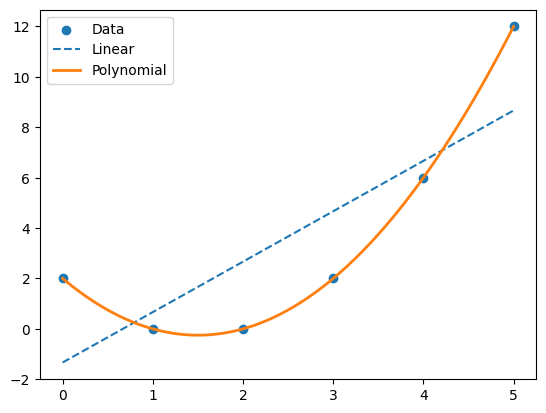

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data that follows y = x^2 - 3x + 2
X = np.array([0, 1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 0, 0, 2, 6, 12])

# Linear fit (poor)
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(X, y)

# Polynomial fit (good)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# Visualize
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
plt.scatter(X, y, label='Data')
plt.plot(X_test, model_linear.predict(X_test), label='Linear', linestyle='--')
plt.plot(X_test, model_poly.predict(poly.transform(X_test)), label='Polynomial', linewidth=2)
plt.legend()
plt.show()

Original: [[2 3]
 [4 5]
 [6 7]]
Polynomial Features:
 [[ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]
 [ 1.  6.  7. 36. 42. 49.]]
Feature Names: ['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2']
Coefficients: [ 0.          0.04352127  0.04352127 -0.03165183  0.01186944  0.0553907 ]


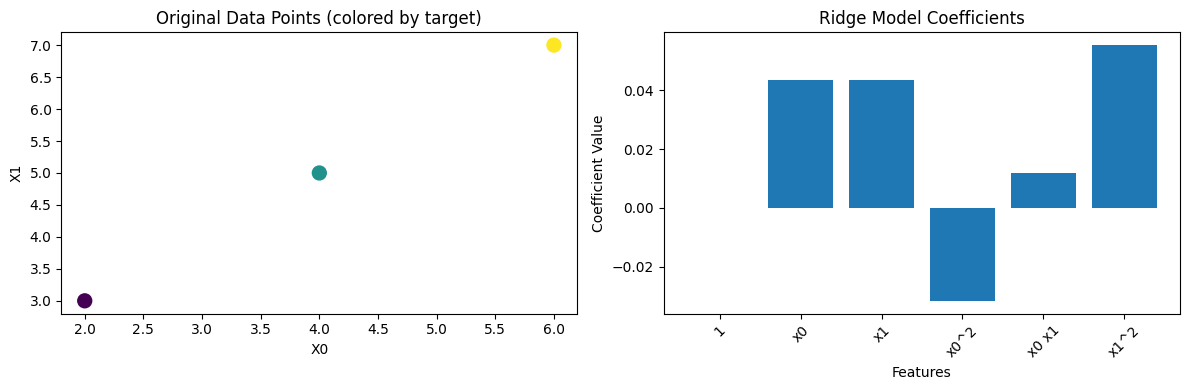

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge  # ✅ Correct import
import matplotlib.pyplot as plt
import numpy as np

X = np.array([[2, 3], [4, 5], [6, 7]]).reshape(-1, 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = Ridge(alpha=1.0)
model.fit(X_poly, np.array([1, 2, 3]))

print("Original:", X)
print("Polynomial Features:\n", X_poly)
print("Feature Names:", poly.get_feature_names_out())
print("Coefficients:", model.coef_)

# Proper visualization - show coefficients
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Original data points
ax1.scatter(X[:, 0], X[:, 1], c=np.array([1, 2, 3]), cmap='viridis', s=100)
ax1.set_xlabel("X0")
ax1.set_ylabel("X1")
ax1.set_title("Original Data Points (colored by target)")

# Plot 2: Model coefficients
ax2.bar(poly.get_feature_names_out(), model.coef_)
ax2.set_title("Ridge Model Coefficients")
ax2.set_xlabel("Features")
ax2.set_ylabel("Coefficient Value")
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Create a 1D array with 12 elements
arr = np.arange(12)
print("Original array:", arr)
print("Original shape:", arr.shape)

# Reshape to a 2x6 2D array
reshaped_arr_2d = arr.reshape(2, 6)
print("\nReshaped to 2x6:", reshaped_arr_2d)
print("Shape of 2x6 array:", reshaped_arr_2d.shape)

# Reshape to a 3x4 2D array using -1 for one dimension
reshaped_arr_inferred = arr.reshape(3, -1)
print("\nReshaped to 3x-1 (inferred 3x4):", reshaped_arr_inferred)
print("Shape of inferred array:", reshaped_arr_inferred.shape)

# Reshape to a 2x2x3 3D array
reshaped_arr_3d = arr.reshape(2, 2, -1)
print("\nReshaped to 2x2x3:", reshaped_arr_3d)
print("Shape of 3D array:", reshaped_arr_3d.shape)

print(f"linespace values: {np.linspace(0, 1, 5).reshape(-1)}")

Original array: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Original shape: (12,)

Reshaped to 2x6: [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
Shape of 2x6 array: (2, 6)

Reshaped to 3x-1 (inferred 3x4): [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Shape of inferred array: (3, 4)

Reshaped to 2x2x3: [[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]
Shape of 3D array: (2, 2, 3)
linespace values: [0.   0.25 0.5  0.75 1.  ]


Original: [[2 3]
 [4 5]
 [6 7]]
Polynomial Features: [[ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]
 [ 1.  6.  7. 36. 42. 49.]]
Feature Names: ['1' 'x0' 'x1' 'x0^2' 'x0 x1' 'x1^2']
Coefficients: [ 0.          0.04352127  0.04352127 -0.03165183  0.01186944  0.0553907 ]


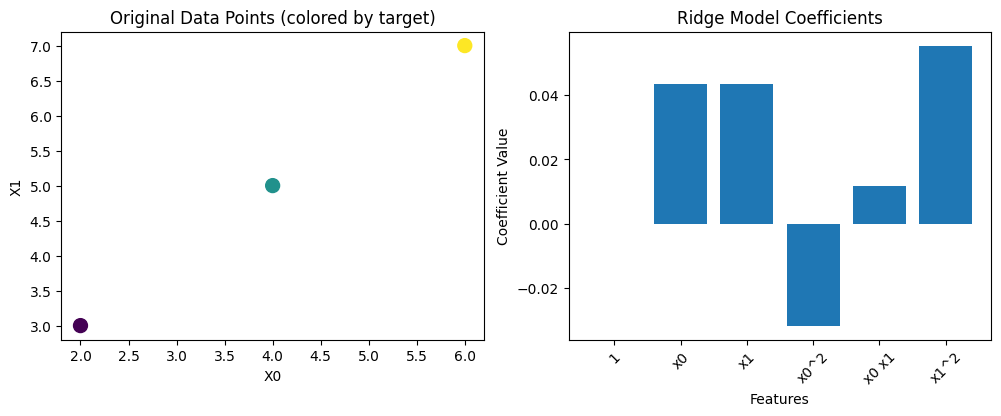

In [ ]:
from scipy.stats._continuous_distns import alpha
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge  # ✅ Correct import
import matplotlib.pyplot as plt
import numpy as np

X = np.array([[2, 3], [4, 5], [6, 7]]).reshape(-1, 2)
pply = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
model = Ridge(alpha=1.0)
model.fit(X_poly, np.array([1, 2, 3]))


print("Original:", X)
print("Polynomial Features:", X_poly)
print("Feature Names:", poly.get_feature_names_out())
print("Coefficients:", model.coef_)
# Proper visualization - show coefficients
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1: Original data points
ax1.scatter(X[:, 0], X[:, 1], c=np.array([1, 2, 3]), cmap='viridis', s=100)
ax1.set_xlabel("X0")
ax1.set_ylabel("X1")
ax1.set_title("Original Data Points (colored by target)")
# Plot 2: Model coefficients
ax2.bar(poly.get_feature_names_out(), model.coef_)
ax2.set_title("Ridge Model Coefficients")
ax2.set_xlabel("Features")
ax2.set_ylabel("Coefficient Value")
ax2.tick_params(axis='x', rotation=45)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Real-world scenario: RSI vs Next-Day Returns (non-linear relationship)
np.random.seed(42)
rsi = np.linspace(0, 100, 50)  # RSI values from 0 to 100

# REALITY: Returns follow a curve (oversold/overbought extremes perform better)
# Low RSI (<30) → positive returns (oversold bounce)
# Mid RSI (40-60) → near-zero returns (neutral)
# High RSI (>70) → negative returns (overbought reversal)
true_returns = -0.001 * (rsi - 50)**2 + 2.5 + np.random.randn(50) * 0.5

X = rsi.reshape(-1, 1)
y = true_returns

# TRY 1: Standard Linear Regression (FAILS!)
lr = LinearRegression()
lr.fit(X, y)
y_pred_linear = lr.predict(X)

# TRY 2: Polynomial Regression (SUCCEEDS!)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
lr_poly = LinearRegression()
lr_poly.fit(X_poly, y)
y_pred_poly = lr_poly.predict(X_poly)

# Compare
print("Linear Model Equation: y = {:.4f}*RSI + {:.4f}".format(lr.coef_[0], lr.intercept_))
print("Polynomial Model: y = {:.4f}*RSI² + {:.4f}*RSI + {:.4f}".format(
    lr_poly.coef_[2], lr_poly.coef_[1], lr_poly.intercept_))

from sklearn.metrics import r2_score
print(f"\nLinear R²: {r2_score(y, y_pred_linear):.4f}")
print(f"Polynomial R²: {r2_score(y, y_pred_poly):.4f}")


Linear Model Equation: y = -0.0029*RSI + 1.6649
Polynomial Model: y = -0.0009*RSI² + 0.0864*RSI + 0.2070

Linear R²: 0.0106
Polynomial R²: 0.7093


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Simulate Multi-Timeframe RSI data
np.random.seed(42)
n_samples = 200

# MTF RSI: 15min, 1hr, 4hr
rsi_15m = np.random.uniform(20, 80, n_samples)
rsi_1h = np.random.uniform(25, 75, n_samples)
rsi_4h = np.random.uniform(30, 70, n_samples)

# Next-candle returns (target variable)
# Reality: Non-linear relationship exists
# - Strong alignment (all RSI similar) → stronger signal
# - Divergence (RSI mismatch) → weaker signal
# - Extreme RSI + alignment → mean reversion
returns = (
    0.02 * rsi_15m +
    0.03 * rsi_1h +
    -0.0005 * (rsi_15m - 50)**2 +  # Parabolic component (mean reversion at extremes)
    0.001 * rsi_15m * rsi_1h +      # Interaction: alignment effect
    -0.0002 * (rsi_1h - rsi_4h)**2 + # Divergence penalty
    np.random.randn(n_samples) * 0.5
)

# Prepare data
X = np.column_stack([rsi_15m, rsi_1h, rsi_4h])
y = returns

print("=" * 70)
print("MTF RSI POLYNOMIAL REGRESSION ANALYSIS")
print("=" * 70)

# Model 1: LINEAR (Baseline)
lr = LinearRegression()
lr.fit(X, y)

print("\n### LINEAR MODEL ###")
print("Equation: Return = b0 + b1*RSI_15m + b2*RSI_1h + b3*RSI_4h")
print(f"\nCoefficients:")
print(f"  Intercept (b0):    {lr.intercept_:.6f}")
print(f"  RSI_15m (b1):      {lr.coef_[0]:.6f}")
print(f"  RSI_1h (b2):       {lr.coef_[1]:.6f}")
print(f"  RSI_4h (b3):       {lr.coef_[2]:.6f}")
print(f"\nR² Score: {lr.score(X, y):.4f}")

print("\n" + "=" * 70)

# Model 2: POLYNOMIAL (Degree 2) - Captures non-linearity
poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly.fit_transform(X)

lr_poly = LinearRegression()
lr_poly.fit(X_poly, y)

feature_names = poly.get_feature_names_out(['RSI_15m', 'RSI_1h', 'RSI_4h'])

print("\n### POLYNOMIAL MODEL (Degree 2) ###")
print("Features created:", X_poly.shape[1])
print(f"\nTop 10 Most Important Coefficients (by absolute value):")
coef_importance = [(name, coef) for name, coef in zip(feature_names, lr_poly.coef_)]
coef_importance_sorted = sorted(coef_importance, key=lambda x: abs(x[1]), reverse=True)[:10]

for name, coef in coef_importance_sorted:
    print(f"  {name:25s}: {coef:10.6f}")

print(f"\nR² Score: {lr_poly.score(X_poly, y):.4f}")
print(f"Improvement over linear: {(lr_poly.score(X_poly, y) - lr.score(X, y))*100:.2f}%")

print("\n" + "=" * 70)
print("INTERPRETATION: WHAT DO THESE COEFFICIENTS TELL YOU?")
print("=" * 70)

# Analyze specific coefficient patterns
print("\n1. LINEAR TERMS (Direct Impact):")
print(f"   RSI_15m coefficient: {lr_poly.coef_[1]:.6f}")
print("   → Interpretation: For every 1-point increase in 15m RSI,")
print(f"     returns change by {lr_poly.coef_[1]:.6f} (holding other factors constant)")

print("\n2. QUADRATIC TERMS (Curvature/Extremes):")
squared_idx = [i for i, name in enumerate(feature_names) if '^2' in name]
for idx in squared_idx:
    coef = lr_poly.coef_[idx]
    name = feature_names[idx]
    print(f"   {name}: {coef:.6f}")
    if coef < 0:
        print(f"     → INVERTED U-SHAPE: Returns peak at mid-range, decline at extremes")
        print(f"        (Mean reversion signal)")
    else:
        print(f"     → U-SHAPE: Returns improve at extremes (momentum signal)")

print("\n3. INTERACTION TERMS (Multi-Timeframe Confluence):")
interaction_idx = [i for i, name in enumerate(feature_names) 
                   if ' ' in name and '^' not in name and name != '1']
for idx in interaction_idx:
    coef = lr_poly.coef_[idx]
    name = feature_names[idx]
    if abs(coef) > 0.0001:  # Only significant ones
        print(f"   {name}: {coef:.6f}")
        if coef > 0:
            print(f"     → POSITIVE SYNERGY: When both RSI values are high/aligned,")
            print(f"        returns amplify (stronger signal)")
        else:
            print(f"     → NEGATIVE SYNERGY: Divergence between timeframes")
            print(f"        reduces expected returns (conflicting signals)")

print("\n" + "=" * 70)
print("PRACTICAL TRADING INSIGHTS")
print("=" * 70)

# Scenario analysis
scenarios = [
    ("Oversold Alignment", [25, 28, 30]),
    ("Neutral State", [50, 50, 50]),
    ("Overbought Alignment", [75, 72, 70]),
    ("Bullish Divergence", [65, 50, 40]),
    ("Extreme Oversold", [15, 18, 20])
]

print("\nPredicted Returns for Different MTF RSI Scenarios:\n")
for scenario_name, rsi_values in scenarios:
    X_scenario = np.array([rsi_values])
    X_scenario_poly = poly.transform(X_scenario)
    pred = lr_poly.predict(X_scenario_poly)[0]
    print(f"{scenario_name:25s} | RSI: {rsi_values} → Return: {pred:+.4f}")

print("\n" + "=" * 70)
print("KEY TAKEAWAY")
print("=" * 70)
print("""
Polynomial coefficients quantify HOW and HOW MUCH non-linear effects matter:

1. **Squared terms** reveal if extremes behave differently than mid-ranges
   - Negative coef on RSI² → Mean reversion at extremes (oversold/overbought)
   - Positive coef on RSI² → Momentum continuation at extremes

2. **Interaction terms** show if timeframe alignment amplifies signals
   - Large positive coef on RSI_15m*RSI_1h → Confluence = stronger edge
   - Negative coef → Divergence weakens the setup

3. **Magnitude = Importance**: Larger |coefficient| = bigger impact on returns
   - Use this to prioritize which MTF combinations matter most

For your algo: Build entry rules around the strongest polynomial terms!
""")


MTF RSI POLYNOMIAL REGRESSION ANALYSIS

### LINEAR MODEL ###
Equation: Return = b0 + b1*RSI_15m + b2*RSI_1h + b3*RSI_4h

Coefficients:
  Intercept (b0):    -2.747131
  RSI_15m (b1):      0.069594
  RSI_1h (b2):       0.076289
  RSI_4h (b3):       0.003513

R² Score: 0.8776


### POLYNOMIAL MODEL (Degree 2) ###
Features created: 10

Top 10 Most Important Coefficients (by absolute value):
  RSI_15m                  :   0.079173
  RSI_4h                   :  -0.040775
  RSI_1h                   :   0.033999
  RSI_15m RSI_1h           :   0.000954
  RSI_1h RSI_4h            :   0.000731
  RSI_15m^2                :  -0.000565
  RSI_1h^2                 :  -0.000420
  RSI_4h^2                 :   0.000092
  RSI_15m RSI_4h           :  -0.000028
  1                        :   0.000000

R² Score: 0.9188
Improvement over linear: 4.12%

INTERPRETATION: WHAT DO THESE COEFFICIENTS TELL YOU?

1. LINEAR TERMS (Direct Impact):
   RSI_15m coefficient: 0.079173
   → Interpretation: For every 1-point i

In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Data
x = np.array([1,2,3,4,5,6,7])
y = np.array([2,4,7,8,8,7,5])

# LOWESS
lowess = sm.nonparametric.lowess

smoothed = lowess(y, x, frac=0.4)  # 40% of data in each local fit

# Plot
plt.scatter(x, y)
plt.plot(smoothed[:,0], smoothed[:,1])
plt.show()


ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
class Solution {

    class Cells {
        int x;
        int y;
        int obstacles;

        public Cells(int x, int y, int obstacles) {
            this.x = x;
            this.y = y;
            this.obstacles = obstacles;
        }
    }

    public int minimumObstacles(int[][] grid) {
        int n = grid.length;
        int m = grid[0].length;
        int[][] dp = new int[n][m];
        PriorityQueue<Cells> pq = new PriorityQueue<>((a, b) -> a.obstacles - b.obstacles);
        for (int i = 0; i < n; i++) {
            Arrays.fill(dp[i], Integer.MAX_VALUE);
        }
        dp[0][0] = 0;
        pq.offer(new Cells(0, 0, 0));
        int[][] directions = {{1, 0}, {-1, 0}, {0, 1}, {0, -1}};
        int mini = Integer.MAX_VALUE;
        while (!pq.isEmpty()) {
            Cells cell = pq.poll();
            int x = cell.x;
            int y = cell.y;
            int obstacles = cell.obstacles;
            if (x == n - 1 && y == m - 1) { 
                mini = Math.min(mini, obstacles);
            }
            for (int[] dir : directions) {
                int newX = x + dir[0];
                int newY = y + dir[1];
                if (newX >= 0 && newX < n && newY >= 0 && newY < m) {
                    int newObstacles = obstacles + grid[newX][newY];
                    if (newObstacles < dp[newX][newY]) {
                        dp[newX][newY] = newObstacles;
                        pq.offer(new Cells(newX, newY, newObstacles));
                    }
                }
            }
        }
        return mini;
    }
}



In [ ]:
from typing import List
class Solution:
    def isSafeBoundry(self, x: int, y: int, n: int, m: int) -> bool:
        return 0 <= x < n and 0 <= y < m 
    def shortestPath(self, grid: List[List[int]], k: int) -> int:
        n = len(grid)
        m = len(grid[0])
        dp = [[[float('inf')] * (k + 1) for _ in range(m)] for _ in range(n)]
        dp[0][0][0] = 0
        queue = [(0, 0, 0)]  # (x, y, obstacles eliminated)
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        while queue:
            x, y, elim = queue.pop(0)
            for dx, dy in directions:
                newX, newY =  x+ dx, y + dy
                if self.isSafeBoundry(newX, newY, n, m):
                    newElim = elim + grid[newX][newY]
                    if newElim <= k and dp[newX][newY][newElim] > dp[x][y][elim] + 1:
                        dp[newX][newY][newElim] = dp[x][y][elim] + 1
                        queue.append((newX, newY, newElim))
        ans = min(dp[n - 1][m - 1])
        return ans if ans != float('inf') else -1

if __name__ == "__main__":
    s = Solution()
    print(s.shortestPath([[0,0,0],[1,1,0],[0,0,0],[0,1,1],[0,0,0]], 1))  # Expected output: 6


NameError: name 'List' is not defined